# Pre processing of dataset

In [1]:
import plotly.io as pio
pio.renderers.default = "notebook+pdf"

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("./Data/kag_risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
target = 'Biopsy'

In [5]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           835 non-null    object
 2   First sexual intercourse            835 non-null    object
 3   Num of pregnancies                  835 non-null    object
 4   Smokes                              835 non-null    object
 5   Smokes (years)                      835 non-null    object
 6   Smokes (packs/year)                 835 non-null    object
 7   Hormonal Contraceptives             835 non-null    object
 8   Hormonal Contraceptives (years)     835 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                835 non-null    object
 12 

In [6]:
df = df.replace('?', np.nan)

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


# Define the function that would be use for training in SKLearn

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import ADASYN
import time


def training_loop(df, target, performance_metrics):
    # Split data into training and testing dataset
    X = df.drop(columns=[target])
    y = df[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, shuffle=True)

    # Apply ADASYN only on the training data
    adasyn = ADASYN()
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

    # Model list using Scikit-learn classifiers
    models = [
        ("Logistic Regression", LogisticRegression(max_iter=1000)),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier()),
        ("SVC", SVC(probability=True)),
        ("Naive Bayes", GaussianNB())
    ]

    results = []

    for name, model in models:
        start_time = time.time()
        model.fit(X_train_resampled, y_train_resampled)
        predictions = model.predict(X_test)
        elapsed_time = time.time() - start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

        results.append({
            'Name': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Time(s)': elapsed_time
        })

    return pd.DataFrame(results)

# Example of using the function with a DataFrame `df` and a target column `target`
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Time(s)']
performance_df = pd.DataFrame()

# Assuming `df` is your DataFrame and 'target' is your target column
# Repeat the experiment multiple times as needed
for _ in range(10):
    result = training_loop(df, target, performance_metrics)
    performance_df = pd.concat([performance_df, result], ignore_index=True)


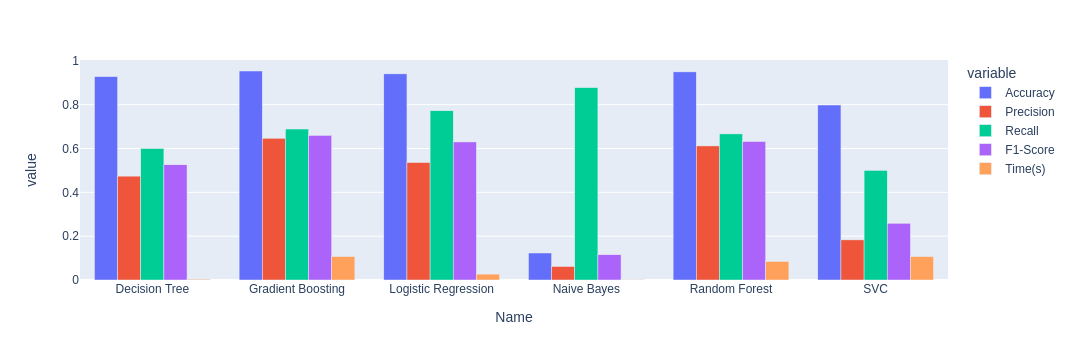

In [9]:
avg_df=performance_df.groupby('Name',as_index=False)[performance_metrics].mean()
acc_comparison = px.bar(avg_df, x="Name",
                        y=performance_metrics,
                        barmode="group")
acc_comparison.show()

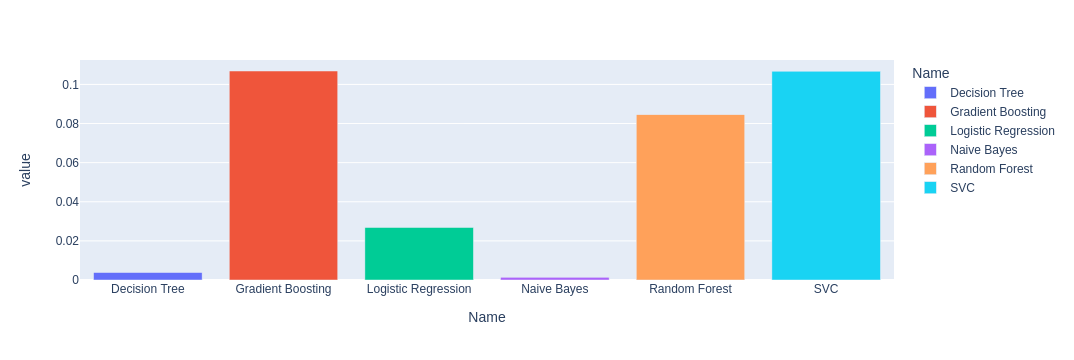

In [10]:
px.bar(performance_df.groupby('Name',as_index=False)['Time(s)'].mean(),x="Name",y=['Time(s)'],color='Name')


In [11]:
performance_df.groupby('Name',as_index=False).mean()


,Name,Accuracy,Precision,Recall,F1-Score,Time(s)
0,Decision Tree,0.927899,0.473896,0.600000,0.525807,0.003815
1,Gradient Boosting,0.953623,0.646740,0.688889,0.659585,0.106856
2,Logistic Regression,0.940580,0.535984,0.772222,0.629992,0.026842
3,Naive Bayes,0.123188,0.061706,0.877778,0.115304,0.001404
4,Random Forest,0.949638,0.611780,0.666667,0.631759,0.084499
5,SVC,0.798551,0.183051,0.500000,0.258773,0.106753
